In [13]:
import numpy as np

class Maze:
    def __init__(self, maze):
        self.maze = maze
        self.goal = (8, 8)
        self.state = (1, 1)
        self.free_cells = [(r, c) for r in range(10) for c in range(10) if maze[r][c] == 0]
        self.free_cells.remove(self.goal)

    def reset(self):
        self.state = (0, 1)
        return self.state

    def step(self, action):
        r, c = self.state
        if action == 0:  # Up
            r -= 1
        elif action == 1:  # Right
            c += 1
        elif action == 2:  # Down
            r += 1
        elif action == 3:  # Left
            c -= 1
        
        if (r, c) in self.free_cells or (r, c) == self.goal:
            self.state = (r, c)
            if self.state == self.goal:
                return self.state, 100, True  # Reward, Done
            else:
                return self.state, -1, False  # Negative reward for each move
        else:
            return self.state, -10, False  # Penalty for hitting a wall

def train(maze_env, episodes=500, learning_rate=0.1, discount_factor=0.99):
    q_table = np.zeros((10, 10, 4))
    for _ in range(episodes):
        state = maze_env.reset()
        done = False
        
        while not done:
            current_r, current_c = state
            action = np.argmax(q_table[current_r, current_c])  # Choosing best action
            next_state, reward, done = maze_env.step(action)
            next_r, next_c = next_state
            # Q-learning update rule
            old_value = q_table[current_r, current_c, action]
            next_max = np.max(q_table[next_r, next_c])
            new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
            q_table[current_r, current_c, action] = new_value
            state = next_state

    return q_table

# Define the maze environment
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# 1 means wall, 0 means free path
# This setup would need to be filled out to match your specific maze structure

maze_env = Maze(maze)
q_table = train(maze_env)

# Now q_table contains the optimal actions at each state


In [14]:
def evaluate_model(maze_env, q_table, trials=100):
    success_count = 0
    total_steps = []
    
    for _ in range(trials):
        state = maze_env.reset()
        done = False
        steps = 0
        
        while not done and steps < 100:  # Limit steps to prevent infinite loops
            current_r, current_c = state
            action = np.argmax(q_table[current_r, current_c])  # Choose the best action from Q-table
            next_state, reward, done = maze_env.step(action)
            state = next_state
            steps += 1
            
            if done and reward == 100:  # Checking if the goal was reached successfully
                success_count += 1
                total_steps.append(steps)
    
    success_rate = success_count / trials
    average_steps = sum(total_steps) / len(total_steps) if total_steps else 0
    
    return success_rate, average_steps

# Assuming maze_env and q_table are already defined and trained
success_rate, average_steps = evaluate_model(maze_env, q_table)
print(f"Success Rate: {success_rate:.2f}")
print(f"Average Steps per Successful Trial: {average_steps:.2f}")

Success Rate: 1.00
Average Steps per Successful Trial: 23.00


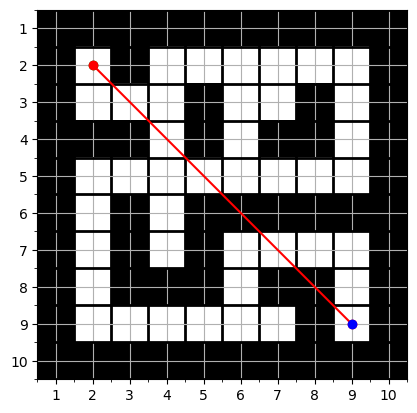

Success Rate: 1.00
Average Steps per Successful Trial: 23.00


In [25]:
def plot_path(maze, start, goal):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap='binary') 
    ax.grid(which='both')

    # Major ticks
    ax.set_xticks(np.arange(0, 10, 1));
    ax.set_yticks(np.arange(0, 10, 1));

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, 11, 1));
    ax.set_yticklabels(np.arange(1, 11, 1));

    # Minor ticks
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    
    state = start
    ax.plot(*state[::-1], "go")  # Start position in green
    steps = 0
    while state != goal and steps < 100:
        current_r, current_c = state
        action = np.argmax(q_table[current_r, current_c])
        next_state, _, done = maze_env.step(action)
        next_r, next_c = next_state
        ax.plot([current_c, next_c], [current_r, next_r], 'ro-')  # Plot path in red
        state = next_state
        steps += 1
        if done:
            break

    ax.plot(*goal[::-1], "bo")  # Goal position in blue
    plt.show()

# Example usage:
plot_path(maze_env.maze, (1, 1), (8, 8))
success_rate, average_steps = evaluate_model(maze_env, q_table)
print(f"Success Rate: {success_rate:.2f}")
print(f"Average Steps per Successful Trial: {average_steps:.2f}")